**Student Name**: Igor Schittekat

**Student ID**: s0160651

# Lab 2: Markov Decision Processes

### Instructions: **TODO** tags

This lab on MDPs has two parts:
1. You will need to formulate written scenarios as MDPs.  For this part, please submit drawings of your MDPs - either decent quality photos of sketches, or (if you're feeling fancy) [beautiful tikz graphs](https://www.mathcha.io/editor) (I recommend using the mathcha editor linked here instead of making tikz plots from LaTeX, unless you *really* know what you're doing)
2. In the second half, you will have to implement the MDP from the course. We will use a framework very similar to what we have done before in the Bandits scenario.

As usual, please *read* and *run* the notebook chronologically, and fill in the **TODO**s as you encounter them.
* <span style="color:blue"> Blue **TODOs** </span> means you have to implement the TODOs in the code.
* <span style="color:red"> Red **TODOs** </span> means you have to submit an explanation (of graph/results).

### Images in notebook cells
To attach an image to a notebook cell, you can simply **drag & drop** it in the cell. This will create a link like `![image.png](attachment:image.png)` in the cell where your mouse dropped the image. If you want to **adjust the size** of the image, you can *then* replace the link with `<img src="attachment:image.png" width="500">` and this should generate a plot of required width; simply adjust the `width` parameter then.

**If the drag&dropping is acting up** - sometimes it refuses to paste an image (often the 2nd) in a cell. If this happens, you can create a cell below and paste it there. Sorry for the trouble!


## 1. Markov Decision Process Statements
*Course Reminder*: a Markov Decision Process (MDP) is a tuple $M = (\mathcal{S}, \mathcal{A}, \mathcal{R}, \gamma, p)$ with $\mathcal{S}$ a set of states, $\mathcal{A}$ a set of actions, $\mathcal{R}$ a set of rewards, $\gamma$ the discount factor, and crucially $p$ the dynamics function $p\left(s^\prime,r \mid s,a \right)$. An MDP is a mathematical object meant to model non-deterministic decision-making situations.
The MDP formalizes the RL framework, by providing the core elements: the sets of states and actions in which our problem takes place, and the dynamics $p$ that define the environment. All that is left to generate a trajectory is the *policy* $\pi \left(a \mid s\right)$ defining the agent. 

Below you can visualize the **link between the RL framework (in black) and its mathematical formulation (in green), as well as its implementation (blue).**
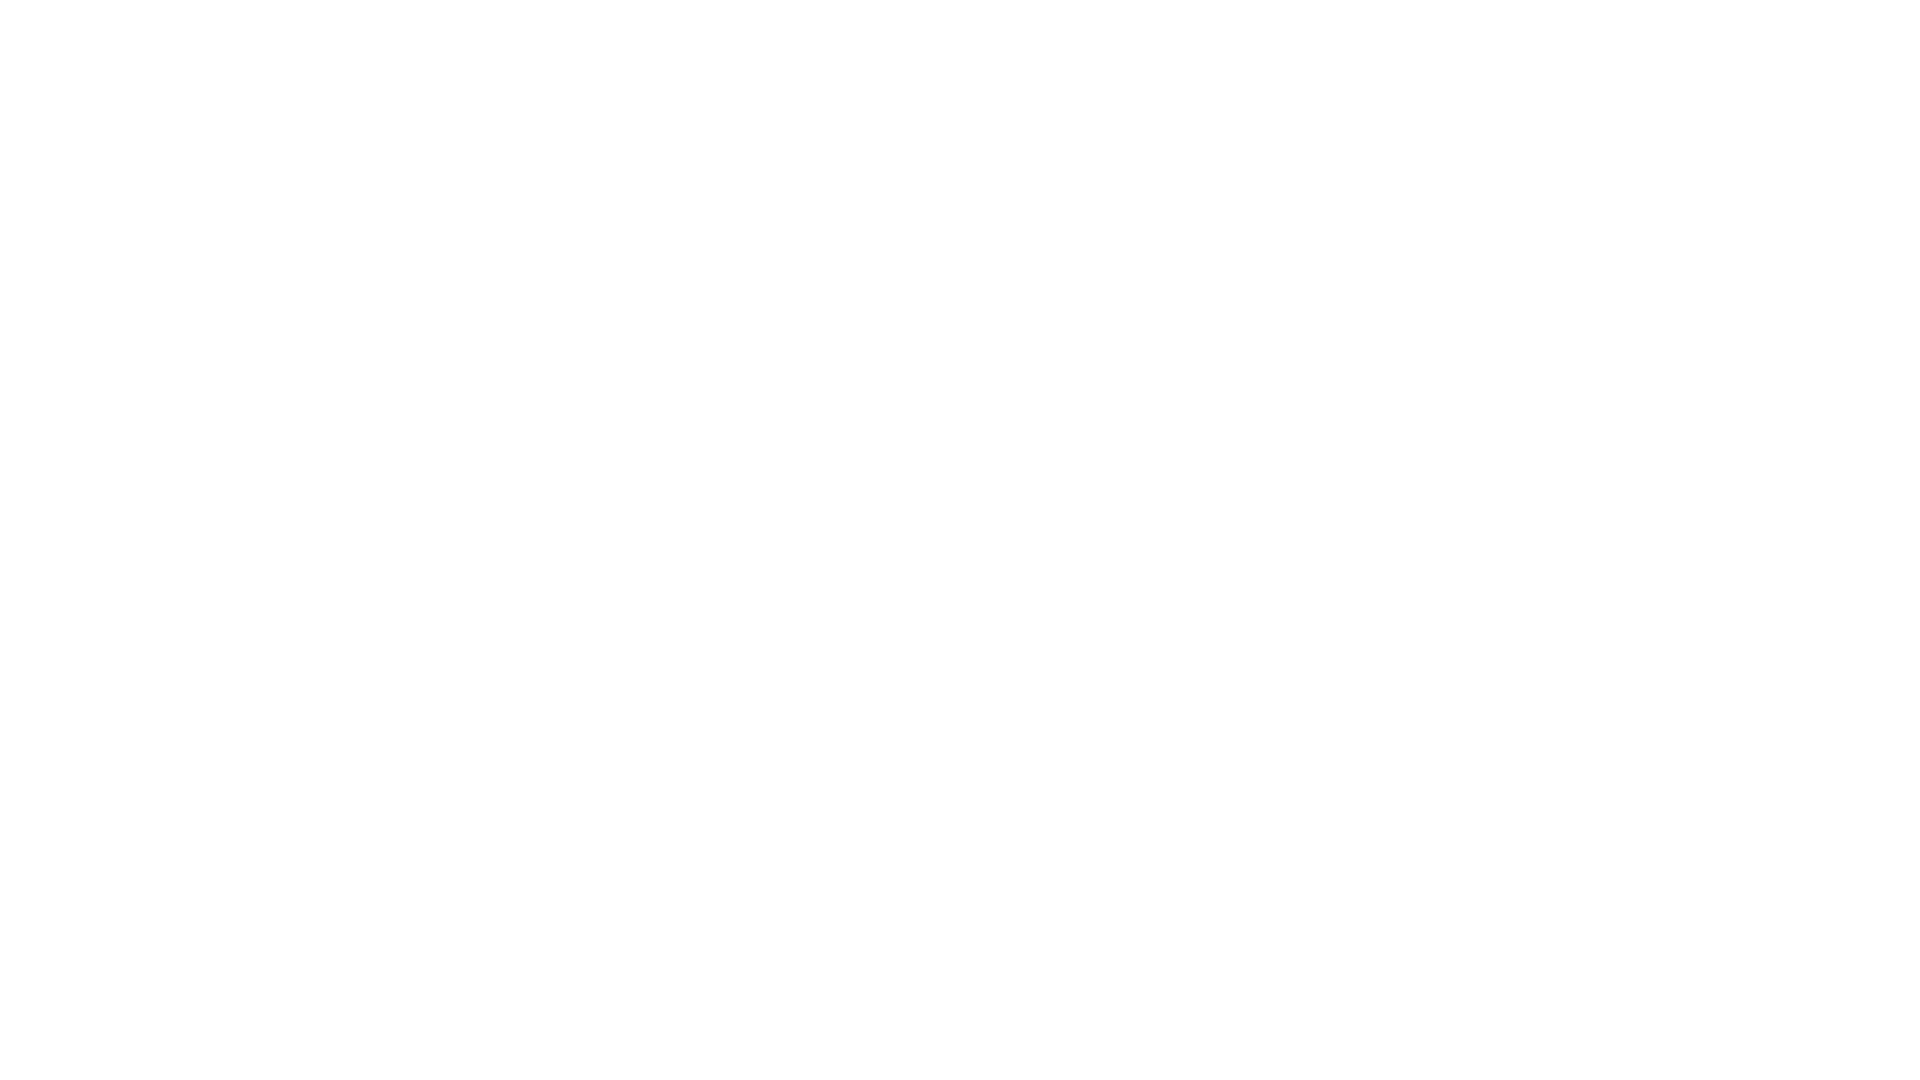


In this lab, you will have to turn written descriptions of problems into MDPs. Please use the convention below for the drawing of your MDPs:

- states as round, white nodes, with the state name inside
- actions as small black nodes sprouting from the states, with the action name closeby
- transition probability and reward on the edge sprouting from the actions and leading to some other state.
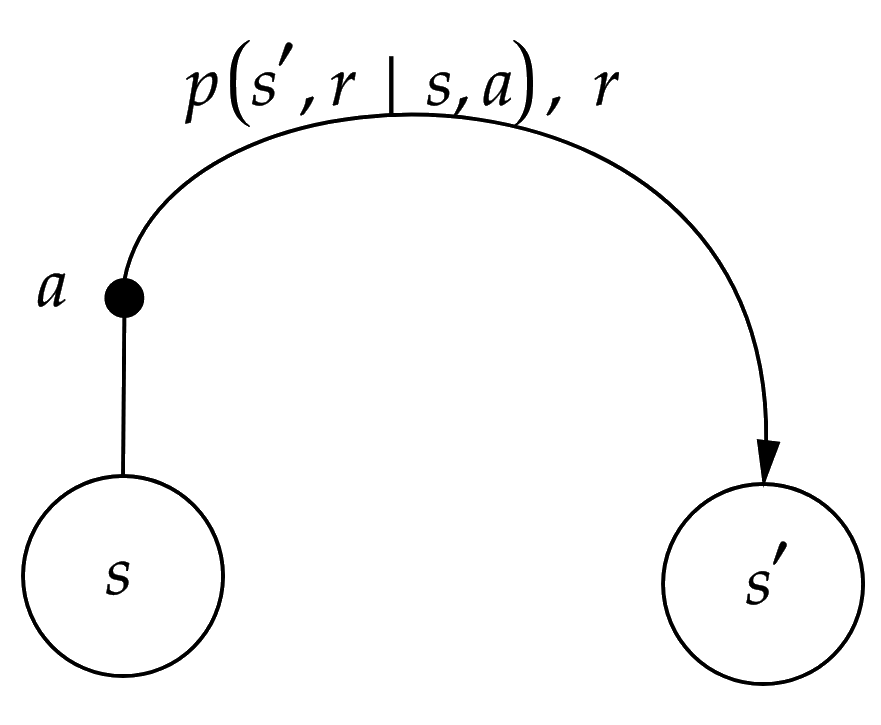

The example below is drawn from the [RL book](http://incompleteideas.net/book/the-book-2nd.html) Chapter 3, page 52, example 3.3; you are encouraged to hop there to understand how to turn a problem statement into an MDP. **Please write actual scalar reward and probability values instead of variable names, unlike in the example below**.
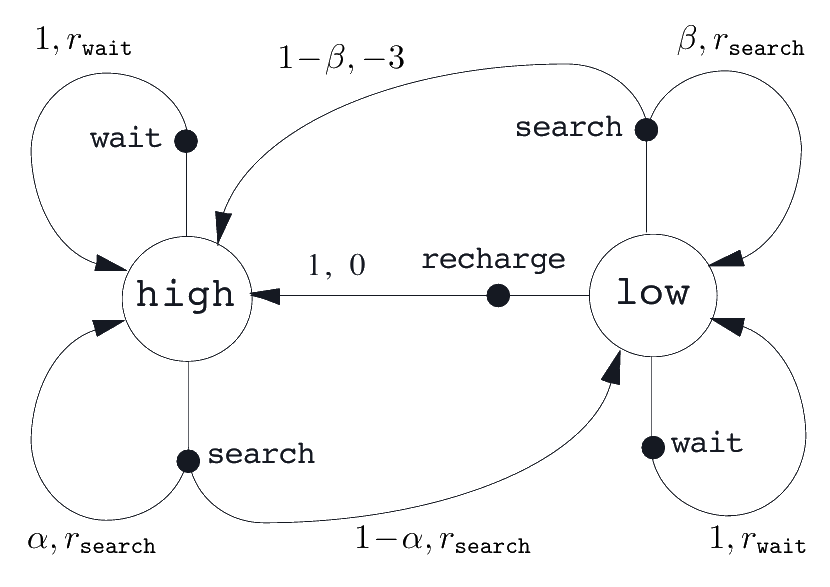
Overall, you can always have this kind of graph in mind when we talk about MDPs, even theoretically.  

### 1.1. Problem statement: a healthy lifestyle
The probabilities and rewards are up to you, but they should be consistent with the problem statement.

> You are a healthy, sane person, but with a weak immune system.
> Every year, you have some probability to get sick, which lowers if you remember to do a health check. When do do a health check and you stay healthy, you sometimes notice it and are happy about it.
> If you are sick, your condition is bad and doing nothing will result in high chances of death, and no chance of recovery whatsoever.
> Your doctor prescribes some medicine for you, which - if you remember to take it- has some probability to cure you. However, even then, chances to die remain, although lowered.

When designing the MDP, make sure that the optimal behavior is to stay healthy and alive!

<span style="color:red"> **TODO** </span>: **Drag & drop** your sketch in this cell below. **Explain** your sketch briefly.
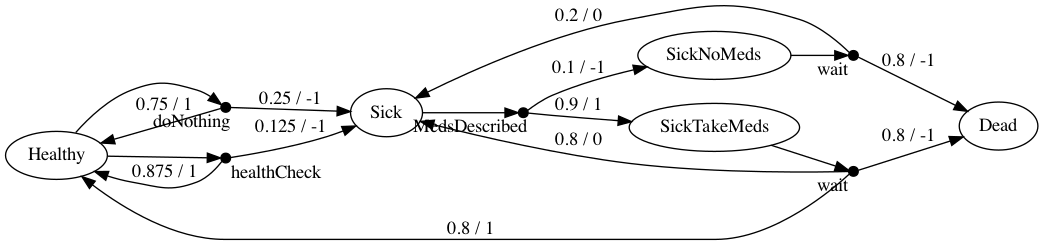

I decided to go with following percentages: <br>
The probability to get sick in a year: 25%<br>
The probability to get sick after checking for your health: 12,5%<br>
Once sick, the probability to die: 8%<br>
Probability to recover when taking medicine: 10%<br>
Probability to remember taking medicine: 90%

I decided to use the following rewards:<br>
Getting more healthy or staying healthy (Also taking meds): 1<br>
Getting more sick or dieing (Also forgetting to take meds): -1<br>
Diaying sick without revovering or dieing: 0

With those percentages and rewarsd, I created the graph. When healthy, you can eigther do nothing or check your health. Once sick, you will get medicine described, but after that you can still forget to take it. After a while, you recover, stay sick (And have new medicine described), or die. 
For simplicity, I decided that it is not possible to die in other ways, without getting sick first. 


### 1.2. Problem statement: Clean&Guide bot
This statement will be based on an [article](https://www.theverge.com/2017/7/21/16007680/lg-airport-robot-cleaning-guide-south-korea-incheon). 
1. Refer to only the first 3 paragraphs of this published article as a problem-statement:

```
In preparation for next year’s Winter Olympics in South Korea, electronics giant LG is trialling new robots in the country’s largest airport. From today, Seoul’s Incheon International Airport will be home to two of LG’s latest prototype bots: the Airport Guide Robot and the Airport Cleaning Robot.

The bots were first unveiled at CES earlier this year, and both do exactly what their names suggest. The Guide Robot will roam the terminals, ready to provide travelers with directions and information about boarding times. It speaks four languages — Korean, English, Chinese, and Japanese — and users can even get it to scan their boarding pass to be escorted to their correct departure gate. Although, if this bot is anything like other service robots, it’ll only move at a steady walking pace, and just think how annoyed you’d be if a slow robot made you miss your flight.

The Cleaning Robot, meanwhile, is essentially a beefed-up Roomba that looks a little like a mini-tank from a future war. [...] Just make sure no one flips the switch in the back of its head from “clean” to “kill.” 
```
2. Based on these, you have to design an MDP for a rechargable battery powered L.G Robot. The robot strictly operates inside the airport with access to only the *Reception*, *Terminal* and *Charging Station*. Assuming you are Principle machine learning engineer within the company, your MDP needs to propose a robot that combines the properties of both Cleaning and Guide robots. If a user shows up at the Reception, the robot can choose to escort the user to the Terminal and every interaction with the user has feedback in (-1, 0, +1) (always provided).

3. Regarding cleaning, just use a general "clean" action with a small reward.

Note that there are several ways to formalize a similar or identical problem!

<span style="color:red"> **TODO** </span>: **Drag & drop** your sketch in this cell below. **Explain** your sketch briefly.
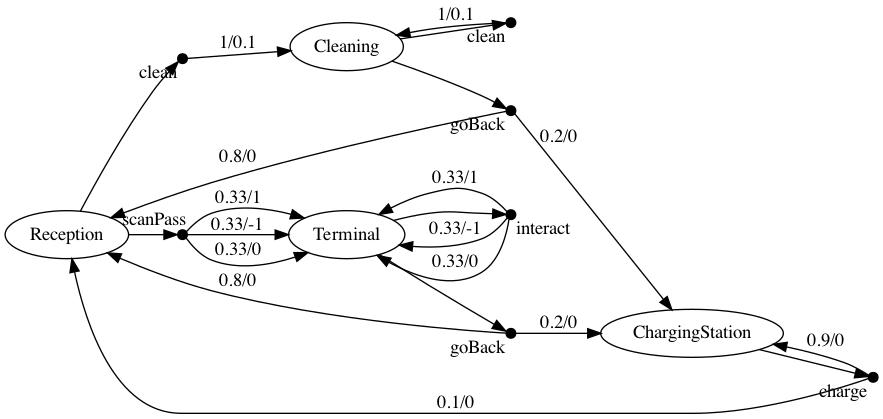

I decided to simplify the language selection. This would unnesesary duplicate the Reception and Terminal states, one for each selected language, and make the plot messy. 

The default station for the robot is the reception. If it's a cleaning robot, he can go cleaning. If it's a guidence robot, he can scan the passes of the customers. Once the passes are scanned, he walks with them to the terminal, and can have multiple interactions with the user. 

After cleaning or after the user is done with the robot, he goes back to the reception. There is a slight chance that the battery is down, and he goes to the charging station. For this I picked 20% to be the threshold. 

For charging, I didn't pick a reward. For every user interaction the robot gets a reward of -1, 0 or 1, and for cleaning the reward is 0.1. 

### 1.3. Problem statement: Bowling
```
          |||
          |||
          _._
        .' ..`.
        |     |  <--- ball
         `---'          

           0
          0 0
         0 0 0   <--- pins
        0 0 0 0
```
We want to model the game of bowling, but we will need to severely simplify it.
The scoring system is quite complex, so let's just say the goal is to hit all the pins in the least tries possible.
The player observes the pins and can choose to throw the ball {left, middle, right}, but the transitions are highly stochastic (player's skill and consistency; hard to know the precise outcome of a throw).
- What would the states of the environment be?
- How many states are there in this environment?
Draw a subset of the MDP (stay below 10 states, abstract out the rest), with initial and terminal state, and some possible transitions from all 3 actions from the start state.

<span style="color:red"> **TODO** </span>: **Drag & drop** your sketch in this cell below. **Answer** the questions and **explain** your sketch briefly.
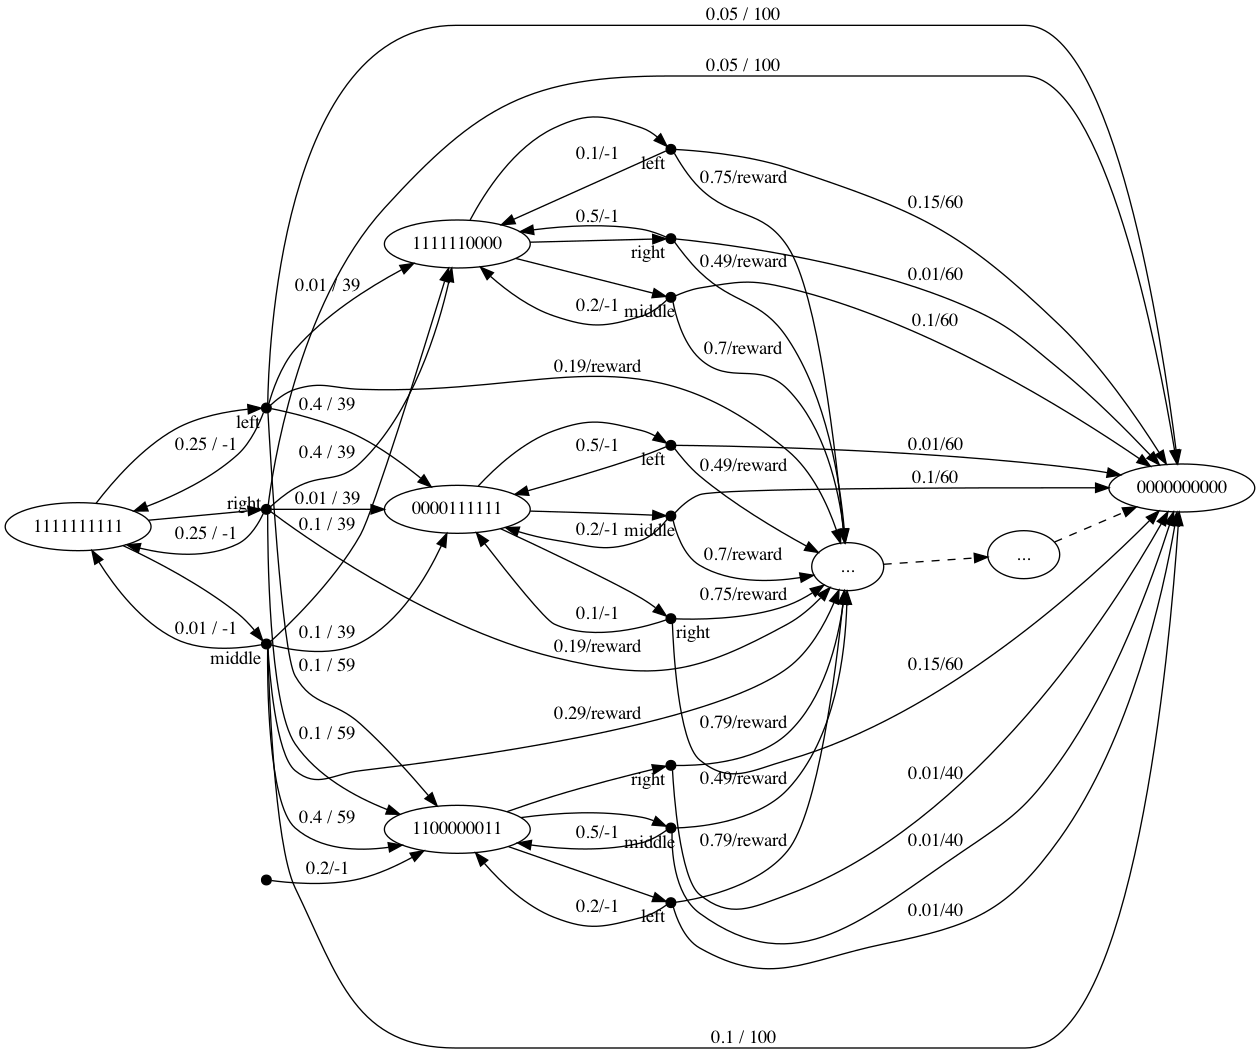
The states are all configurations of the pins (up or down). The starting state is the state with all pins up, and the final state is the one indicating that all pins are down. Because there are 10 pins, and 2 configurations for each pin (up or down), we end up with 2^10 states, or 1024 states. 

There are 3 actions, and each action can have a noise. In general, throwing left will nock over the left pins, throwing in the middle will noch the middle ones over, and throwing right will nock over the right ones. So I gave the highest probability of knocking them over as explained. Knocking over the fist one, will most likely knock over the pins behind that one as well, but there is a small percentage possible that this is not the case. That's why we can't make this for sure. 

Throwing the ball left or right also has a chance of throwing in into the pit, which nocks out none of the pins. As a result, you will end up in the same state again. 

For a reward function, I came up with the following: Knocking over a pin gives 10 points. I gave a living reward of -1 so the number of throws are accounted for. So going from a state with 6 pins up to a state with 4 pins up will give a reward of 19 points. 

Once pins are down, they can't come back up again, so we are sure we will terminate eventially. 

### 1.4. Problem statement: Course's maze
In the slides 7 and 8 of the course, we used a same maze as MDP example:
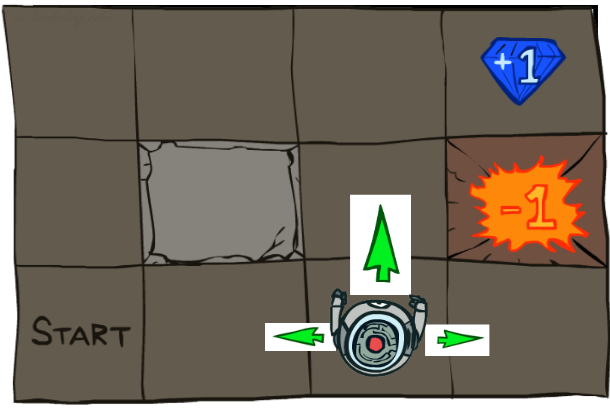

**Draw** the corresponding MDP graph for this problem. A few things need to be clarified:

- Assume no noise. It would make the plot very messy!
- You can use capitals N S E W to shorten the North South East West actions.
- The two states indicated `+1` and `-1` are not yet terminal. They both lead to the same state TERMINAL with unique available action EXIT, and the transition yields the indicated rewards. 
- Assume a small living reward of -0.1 that does not apply for the exit transition.

Note that we could also frame this problem with states indicated `+1` and `-1` being terminal; we do not do this for plotting purposes in the following lab. Stay tuned!

- In addition to the MDP, please **draw** (on the side or on a separate plot) how the **start state** would look if there was `noise=0.2`. As a reminder, the `noise` parameter *in this specific MDP* is the probability that the agent is *not* taking the expected action - e.g. doing west when asked north. In our case, it takes you with equal probability to the two orthogonal states, e.g. when asking North, 10% proba to go East, 10% to go West.

<span style="color:red"> **TODO** </span>: **Drag & drop** your sketch in this cell below. **Answer** the questions and **explain** your sketch briefly.
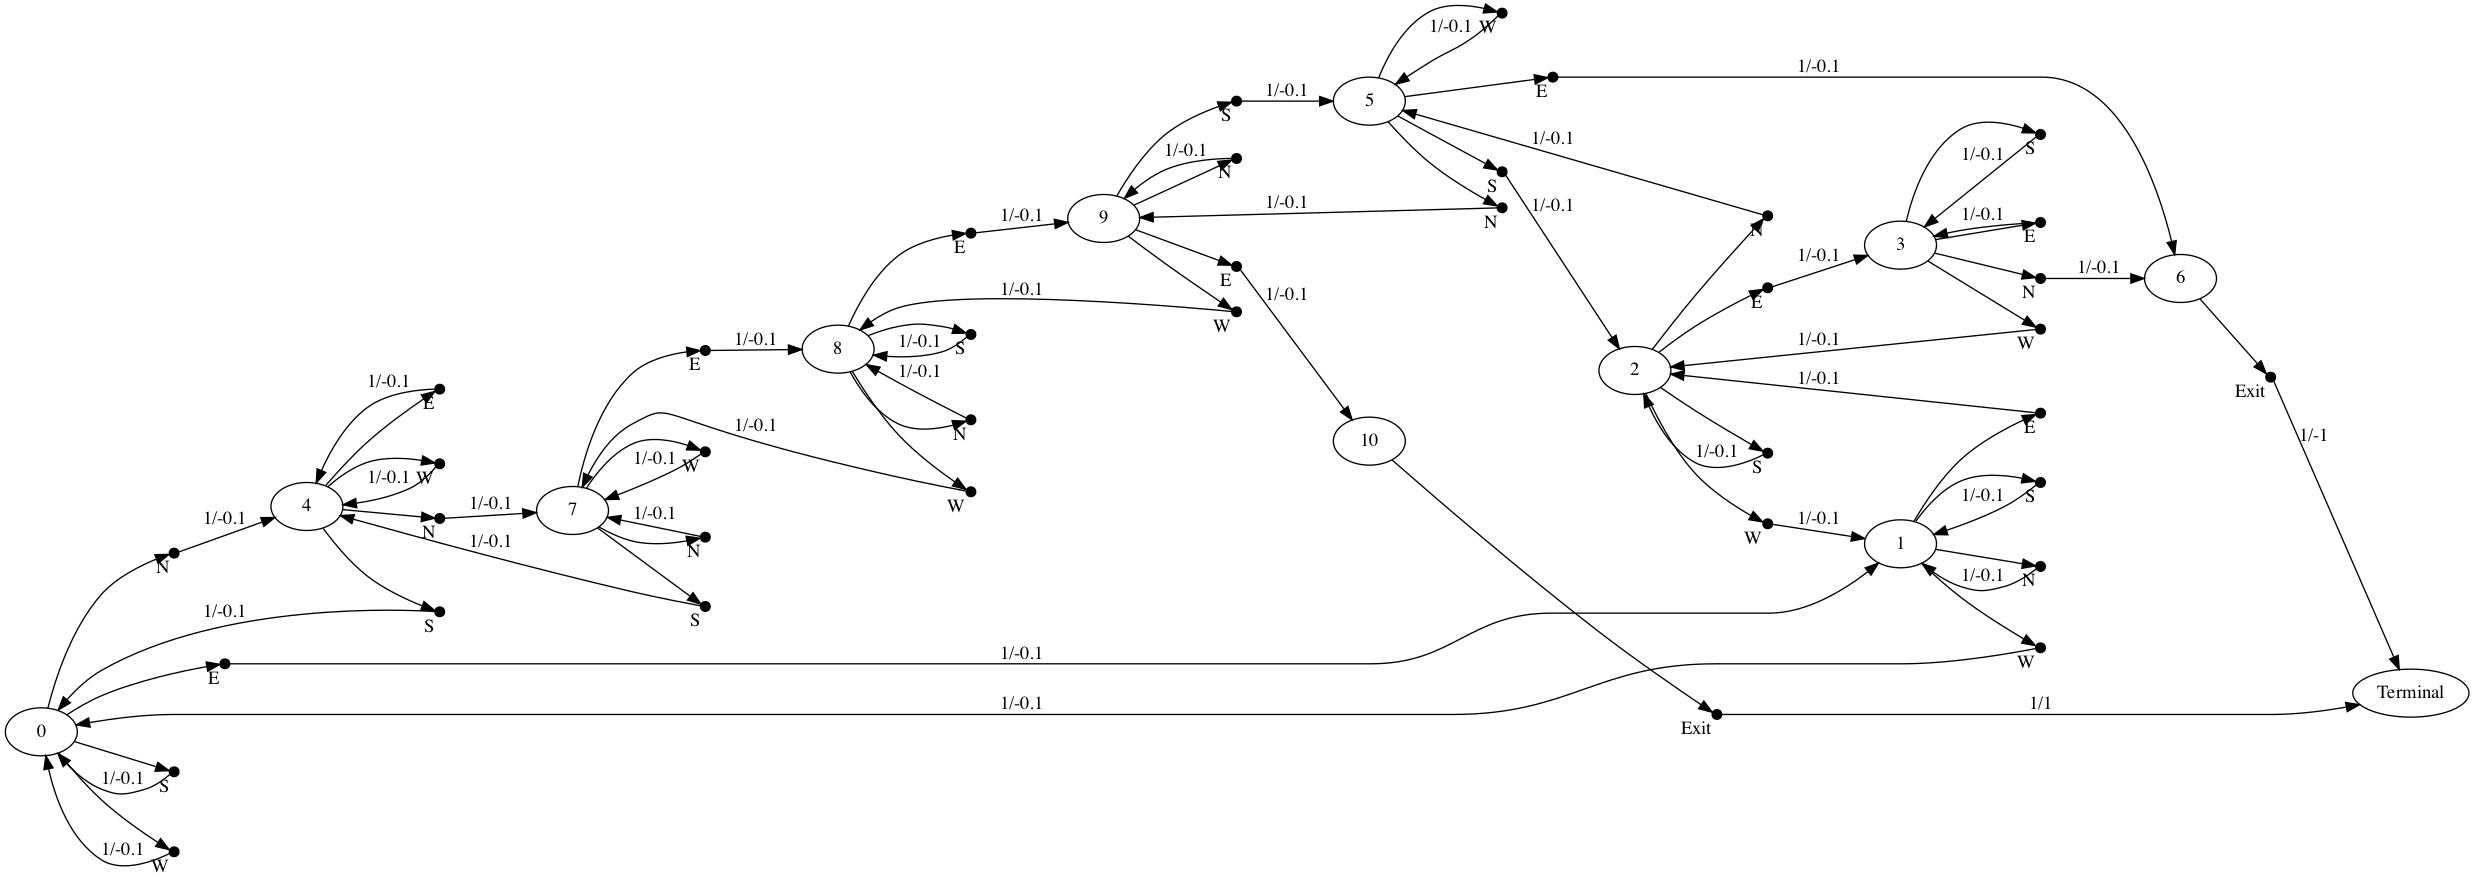
I decided to name the positions as follows:
```
|7 |8 |9 |10|
|4 |  |5 |6 |
|0 |1 |2 |3 |
```

We start in state 0, and state 6 and 10 will lead to the state Terminal with the Exit action.
If we bounce into a wall, for instance when going west from the start, we will end up in the same location from where we started. 

The drawing with noise will look like this: 
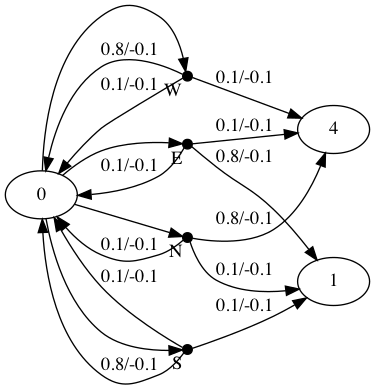



## 2. <span style="color:blue"> **TODO** </span>: MDP Implementation
By now, you should have a solid grasp of the intricacies of the MDP. The time has come to implement one!
We will implement the MDP from the course (statement 4 above). However, unlike when you had to draw it, we will use `noise=0.2`.

There are multiple methods that we want from an MDP. Let's list them:
- <span style="color:blue"> **TODO** </span> `get_states`: returns all the possible states of the MDP. In other words, all the inputs that the *agent can observe*.
- <span style="color:blue"> **TODO** </span> `get_actions`: given a state, returns all the possible actions from that state.
- <span style="color:blue"> **TODO** </span> `p`: the dynamics, for a given state-action input pair. Return all the possible state-reward output pairs, along with the probability for that to happen. 
- <span style="color:blue"> **TODO** </span> `is_terminal`: given a state, returns whether it is terminal.

These methods provide everything we need to know to draw the MDP. However, if we wanted to use it in practice to run an episode - i.e., use the MDP as an *Environment* to interact with, we need a few different methods. The agent needs to start somewhere, in some starting episode sampled from a subset of $\mathcal{S}$ sometimes called $\mathcal{S}_0$. Then, we need to sample from the dynamics to output a state and reward given a state and action. We follow the [`OpenAI gym`](https://gym.openai.com/docs/) convention:
- <span style="color:blue"> **TODO** </span> `reset`: initializes the environment, outputs a starting state.
- <span style="color:blue"> **TODO** </span> `step`: given an action, performs one step in the environment. Formally, samples from the dynamics. For more complex environment like video games however, it is unthinkable to explicitely formulate the dynamics, but it is generally easy to compute a single transition. Outputs the next state, reward, and done signal, i.e. whether we reached a terminal state.

Note that these functions need to keep track of where the agent is. Feel free to add what you want to the `__init__` method if needed.

*Note: Normally in `gym`, the action space would be defined as `Discrete(5)`, meaning 5 possible actions ranging from 0 to 4, since the strings make no actual sense for the agent. In our environment, we will use actions as strings 'north' 'east' etc. for clarity.*

In [1]:
import numpy as np
import gym
from gym import spaces

In [2]:
class CourseEnv(gym.Env):
    """ Gridworld environment from the Course. A 4x3 grid with 2 states in the upper right corner 
    leading to the terminal state.
        """
    def __init__(self):
        self.height = 3
        self.width = 4
        self.observation_space = spaces.Tuple(( # observations come in (x,y) tuples with x:height, y:width.
                spaces.Discrete(self.height),
                spaces.Discrete(self.width)
                ))
        self.actions = ['north', 'east', 'south', 'west', 'exit'] # writing them out for a common convention
        self.noise = .2
        self.start = (2,0)
        self.near_terminals = ((0,3), (1,3)) # state from which there is only the exit action to get to TERMINAL
        self.obstacles = [(1,1)]
        self.living_reward = -0.1
        # You can add elements to this init method if needed.
        self.reset()

    def step(self, action):
        """ Moves the agent according to the input action.
        You can either sample from the dynamics, or simply (if it feels easier) code the agent's movement.
        """
        print("Executing action {}".format(action))
        # TODO: implement this step method.
        assert action in self.actions
        keys, values = zip(*self.p(self.S, action).items())
        next_state, reward = keys[np.random.choice(range(len(keys)), p=values)]
        done = False
        if next_state == 'TERMINAL':
            done = True
        self.S = next_state
        return next_state, reward, done, {} # ignore but keep this last element {}; it is within the gym convention.

    def reset(self):
        """ Prepares for a new episode."""
        # TODO: implement this step method.
        self.S = self.start
        return self.S
    
    def available_actions(self, state=None):
        """
        List of available actions in the provided state
        Parameters
        ----------
        state: tuple (position), string ('TERMINAL') or None
            state from which to provide all actions. If None, use the current environment state.
        Returns
        -------
        ret : list
            List of all actions available in the provided state.
        """
        # TODO: implement this method.
        if state is None:
            state = self.S
        if state in self.near_terminals:
            return ['exit']
        elif state == 'TERMINAL' or state in self.obstacles:
            return []
        return ['north', 'east', 'south', 'west']
            
    
    def p(self, state, action):
        """
        Dynamics function p of the MDP in this state and action.
        Parameters
        ----------
        state: tuple (position) or string ('TERMINAL')
            state from which to provide all actions. If the terminal state is provided, raises an error, 
            as there are no dynamics from the terminal state. 
        action: string 
            in list in ['north', 'east', 'south', 'west', 'exit'] with proper state
        Returns
        -------
        ret : dict
            dictionary of (next_state, reward) pairs with: corresponding probabilities
        """
        # TODO: implement this step method.
        if action == 'exit':
            if self.S == (0,3):
                reward = 1
            else:
                reward = -1
            return {('TERMINAL', reward): 1}
        prob = dict()
        if action in ['north', 'south']:
            prob[(self.get_next_state(state, action), self.living_reward)] = 1 - self.noise
            east = (self.get_next_state(state, 'east'), self.living_reward)
            west = (self.get_next_state(state, 'west'), self.living_reward)
            if east in prob:
                prob[east] += self.noise / 2.0
            else:
                prob[east] = self.noise / 2.0
            if west in prob:
                prob[west] += self.noise / 2.0
            else:
                prob[west] = self.noise / 2.0
        
        elif action in ['east', 'west']:
            prob[(self.get_next_state(state, action), self.living_reward)] = 1 - self.noise
            north = (self.get_next_state(state, 'north'), self.living_reward)
            south = (self.get_next_state(state, 'south'), self.living_reward)
            if north in prob:
                prob[north] += self.noise / 2.0
            else:
                prob[north] = self.noise / 2.0
            if south in prob:
                prob[south] += self.noise / 2.0
            else:
                prob[south] = self.noise / 2.0
        return prob
    
    
    def get_next_state(self, state, action):
        assert action in ['north', 'east', 'south', 'west']
        if action == 'north':
            if state[0] == 0 or (state[0] - 1, state[1]) in self.obstacles:
                return state
            return state[0] - 1, state[1]
        if action == 'south':
            if state[0] == self.height - 1 or (state[0] + 1, state[1]) in self.obstacles:
                return state
            return state[0] + 1, state[1]
        if action == 'west':
            if state[1] == 0 or (state[0], state[1] - 1) in self.obstacles:
                return state
            return state[0], state[1] - 1
        if action == 'east':
            if state[1] == self.width - 1 or (state[0], state[1] + 1) in self.obstacles:
                return state
            return state[0], state[1] + 1
        
    
    def is_terminal(self, state=None):
        """
        Whether the input state is terminal (string 'TERMINAL').
        If no input state is provided, use the self.S state (assumes there is an ongoing episode).
        Parameters
        ----------
        state: tuple (position), string ('TERMINAL') or None
            state from the environment. If None is provided, use the self.S state. 
        Returns
        -------
        ret : bool
            Boolean indicating whether the state is terminal.
        """

        # TODO: implement this is_terminal method.
        if state is None:
            state = self.S
        return state == 'TERMINAL'
    
    def states(self):
        """
        Set (as a list) of all states of the MDP, i.e. set $\mathcal{S}$
        Returns
        -------
        ret : list
            List of all possible states in the environment.
        """
        # TODO: implement this is_terminal method.
        states = ['TERMINAL']
        for i in range(self.height):
            for j in range(self.width):
                state = (i, j)
                if state not in self.obstacles:
                    states.append(state)
        return states

        
    def render(self):
        """ This method is provided to you. 
        Use this to plot the current position of an agent in your environment.
        """
        s = np.zeros((self.height, self.width), dtype=int).astype(str)
        s[self.start] = 'S'
        s[self.obstacles[0]] = 'X'
        s[self.near_terminals[0]] = '+'
        s[self.near_terminals[1]] = '-'
        s[self.S] = '.'
        
        print(self.S)
        print(s)
        # you can uncomment the following line when the available_actions method is implemented:
        print("Available actions: {}".format(self.available_actions()))


Let's test the different functions of your MDP. <span style="color:red"> **TODO** </span> **Run** the following cells and check that the outputs make sense.

In [3]:
mdp = CourseEnv()

In [4]:
mdp.states()

['TERMINAL',
 (0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3)]

In [5]:
print(mdp.available_actions((0,0)))
print(mdp.available_actions((0,3)))
print(mdp.available_actions('TERMINAL'))

['north', 'east', 'south', 'west']
['exit']
[]


In [6]:
mdp.p((0,0), 'north')

{((0, 0), -0.1): 0.9, ((0, 1), -0.1): 0.1}

In [7]:
print(mdp.is_terminal((0,0)))
print(mdp.is_terminal((0,3)))
print(mdp.is_terminal('TERMINAL'))

False
False
True


Now play your environment! <span style="color:red"> **TODO** </span> Please submit your notebook with an episode that shows **a successful trajectory** (reaching the positive reward) **and the existence of the obstacle** (the agent cannot step on it).

In [8]:
env = mdp
state = env.reset()
total_r = 0
steps = 0
while True:
    env.render()
    action = input("Please input an action: ")
    state, reward, done, info = env.step(action)
    total_r += reward
    steps += 1
    if done:
        break

print("Done in {} steps with total reward {:.1f}".format(steps, total_r))

(2, 0)
[['0' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['.' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']


Please input an action:  north


Executing action north
(1, 0)
[['0' '0' '0' '+']
 ['.' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']


Please input an action:  east


Executing action east
(1, 0)
[['0' '0' '0' '+']
 ['.' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']


Please input an action:  north


Executing action north
(0, 0)
[['.' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']


Please input an action:  east


Executing action east
(0, 1)
[['0' '.' '0' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']


Please input an action:  east


Executing action east
(0, 2)
[['0' '0' '.' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']


Please input an action:  east


Executing action east
(1, 2)
[['0' '0' '0' '+']
 ['0' 'X' '.' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']


Please input an action:  north


Executing action north
(0, 2)
[['0' '0' '.' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']


Please input an action:  east


Executing action east
(0, 2)
[['0' '0' '.' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']


Please input an action:  east


Executing action east
(0, 3)
[['0' '0' '0' '.']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['exit']


Please input an action:  exit


Executing action exit
Done in 10 steps with total reward 0.1


In the first action, we go north. In the second one, we ask o go east, but there is an obstacle, so we can't move. Next we go north and a few times east. In state (0,2) we select to go east, but because of the noise we end up south of it. We go north again and ask to go east, but the noise picks out north, and as there is a wall, we stay in the same state. Finally we can go east and take the exit to the terminal state. 